<div style='background-color : orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align : center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#wrangle'>Wrangle</a></li>
<li><a href='#discrete'>Detect Using Discrete Variables</a></li>
<li><a href='#discrete2'>Detect Using 2 Discrete Variables</a></li>

<div style='background-color : orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align : center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# .py files
import wrangle as w
import discrete_prob_method as dpm

In [2]:
# Set default plt style to 'bmh'
mpl.style.use('bmh')

<div style='background-color : orange'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align : center'>
        Wrangle
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b><h3 style='text-align : center'>
    WRANGLE DAT SHIT :D
</h1></b>

In [3]:
# Acquire and prepare the 'logs' dataframe from the codeup
# SQL server
logs = w.prepare()

In [4]:
logs.sample()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
2218,97.105.19.58,16/Apr/2019 19:59:46,GET,/api/v1/sales?page=128,HTTP/1.1,200,512445,python-requests/2.21.0


<div style='background-color : orange'>
<a id='discrete'></a>
    <b><u><i><h1 style='text-align : center'>
        Detect Using Discrete Variables
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

Use basic probability to identify anomalous requests. Using the methods covered in this lesson, examine the rest of the features in the api access logs data set.

==========ip START==========
                count   percent
97.105.19.58    11998  0.858595
173.173.113.51   1059  0.075784
72.181.113.170    613  0.043867
72.181.105.81     246  0.017604
24.26.242.9        21  0.001503
68.201.219.223     21  0.001503
70.121.214.34       2  0.000143
52.87.230.102       2  0.000143
35.175.171.137      2  0.000143
54.145.52.184       1  0.000072
3.92.201.136        1  0.000072
35.174.209.2        1  0.000072
34.229.70.250       1  0.000072
54.172.14.223       1  0.000072
34.207.64.242       1  0.000072
3.88.129.158        1  0.000072
52.91.30.150        1  0.000072
52.90.165.200       1  0.000072
45.23.250.16        1  0.000072


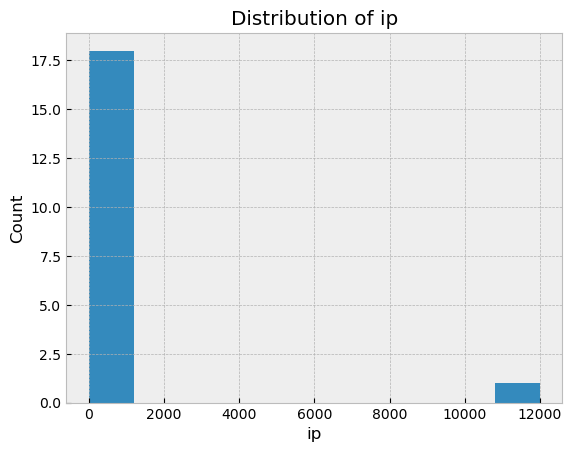

==========ip END==========
==========timestamp START==========
                      count   percent
16/Apr/2019 19:56:10      9  0.000644
16/Apr/2019 19:49:58      8  0.000572
16/Apr/2019 20:01:30      7  0.000501
16/Apr/2019 20:12:23      6  0.000429
16/Apr/2019 20:02:59      6  0.000429
...                     ...       ...
16/Apr/2019 21:10:09      1  0.000072
16/Apr/2019 21:10:07      1  0.000072
16/Apr/2019 21:10:05      1  0.000072
16/Apr/2019 21:10:03      1  0.000072
17/Apr/2019 12:55:14      1  0.000072

[9953 rows x 2 columns]


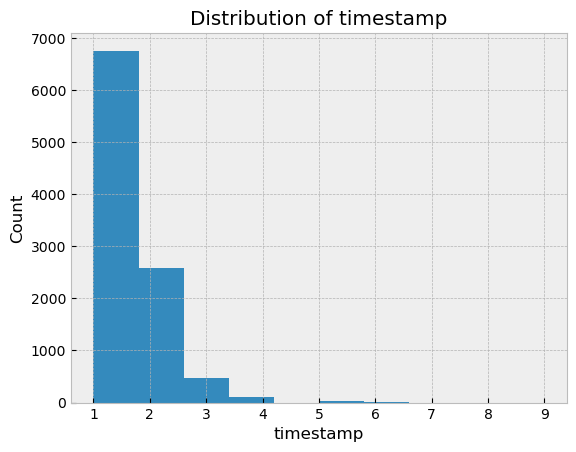

==========timestamp END==========
==========request_method START==========
     count  percent
GET  13974      1.0


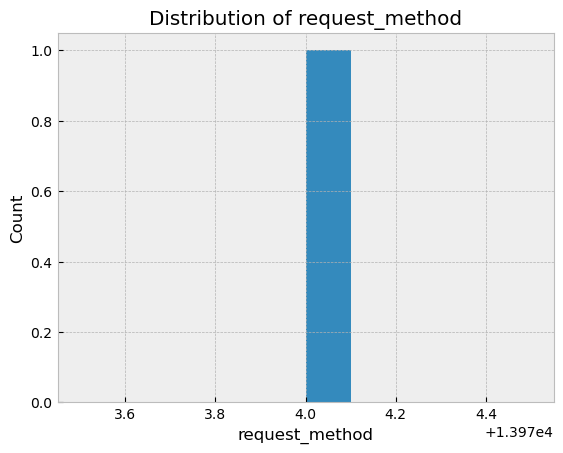

==========request_method END==========
==========request_path START==========
                                   count   percent
/api/v1/sales?page=2                 709  0.050737
/api/v1/items                        464  0.033205
/api/v1/items?page=2                 291  0.020824
/api/v1/items?page=3                 219  0.015672
/api/v1/stores                       162  0.011593
...                                  ...       ...
/api/v1/items?page=0                   1  0.000072
/api/v1/stores?page=999                1  0.000072
/api/v1/stores?page=2                  1  0.000072
/api/v1/stores?page=666                1  0.000072
/api/v1/items/api/v1/items?page=3      1  0.000072

[218 rows x 2 columns]


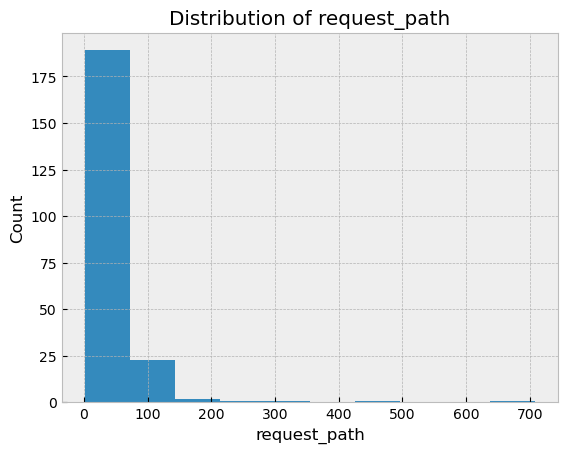

==========request_path END==========
==========http_version START==========
          count  percent
HTTP/1.1  13974      1.0


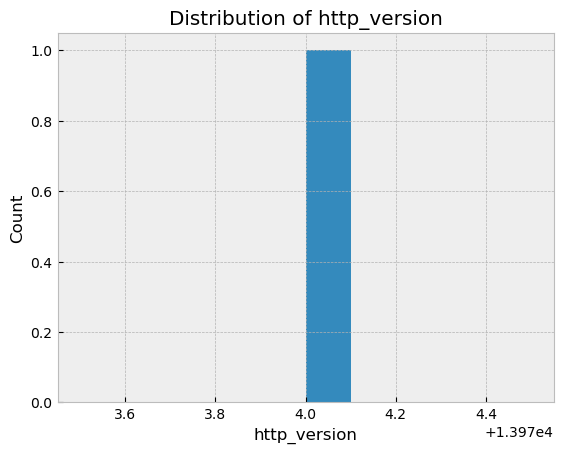

==========http_version END==========
==========status_code START==========
     count   percent
200  13958  0.998855
499     16  0.001145


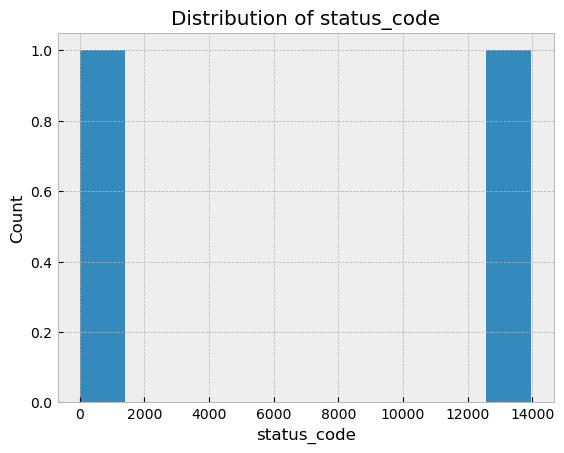

==========status_code END==========
==========size START==========
        count   percent
494819    705  0.050451
3561      548  0.039216
3659      291  0.020824
1328      229  0.016388
1787      219  0.015672
...       ...       ...
327529      1  0.000072
360297      1  0.000072
278377      1  0.000072
343913      1  0.000072
409449      1  0.000072

[187 rows x 2 columns]


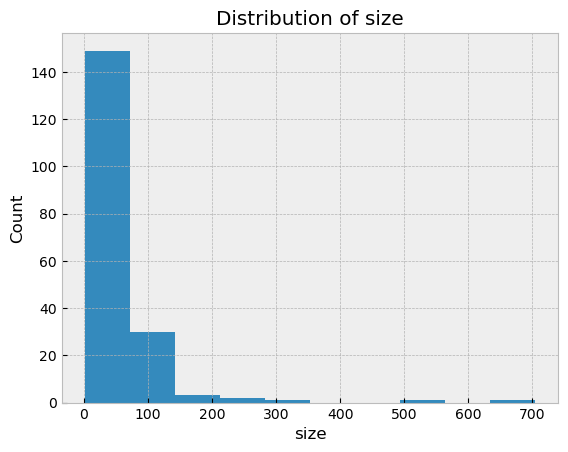

==========size END==========
==========user_agent START==========
                                                    count   percent
python-requests/2.21.0                              12001  0.858809
python-requests/2.20.1                               1911  0.136754
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4)...     34  0.002433
Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; r...      8  0.000572
Slackbot-LinkExpanding 1.0 (+https://api.slack....      7  0.000501
Slackbot 1.0 (+https://api.slack.com/robots)            6  0.000429
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3)...      4  0.000286
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3)...      2  0.000143
Python-urllib/3.7                                       1  0.000072


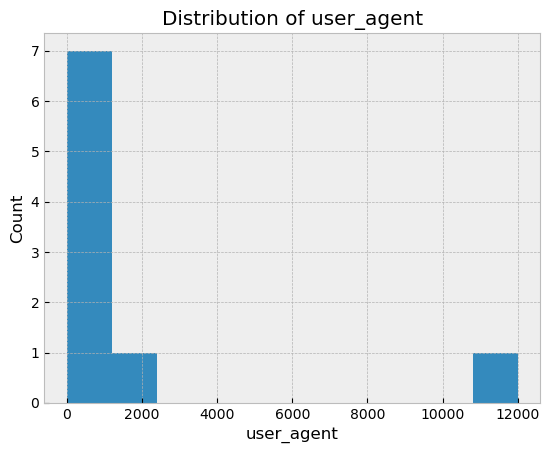

==========user_agent END==========


In [14]:
dpm.detect_anomaly_1(logs, logs.columns.to_list())

- status_code
    - 499 (<0.11%)
- size
    - 130k+

<div style='background-color : orange'>
<a id='discrete2'></a>
    <b><u><i><h1 style='text-align : center'>
        Detect Using 2 Discrete Variables
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

Use basic probability to identify anomalous requests. Using the methods covered in this lesson, examine the rest of the features in the api access logs data set.

In [12]:
for col in logs:
    count = logs[col].nunique()
    print(f'\033[35m{col} Unique Count:\033[0m {count}\n')

ip Unique Count: 19

timestamp Unique Count: 9953

request_method Unique Count: 1

request_path Unique Count: 218

http_version Unique Count: 1

status_code Unique Count: 2

size Unique Count: 187

user_agent Unique Count: 9



In [23]:
logs[logs['size'] > 150000].groupby('ip')['size'].value_counts()

ip              size  
173.173.113.51  510134    14
                510142    12
                510139    10
                510120     9
                510138     9
                          ..
97.105.19.58    513236    52
                278377     1
                327529     1
                343913     1
                360297     1
Name: size, Length: 691, dtype: int64